In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import pickle
import copy

In [5]:
input_text_path = 'data/human_text.txt'
output_text_path = 'data/robot_text.txt'

In [6]:
def get_data(path):
    with open(path, 'r', encoding='utf-8') as f:
        data = f.read()
    return data    

In [7]:
input_text = get_data(input_text_path)
output_text = get_data(output_text_path)

In [8]:
print (input_text[:164])
print ('\n')
print (output_text[:153])

[start]
oh, thanks !  i'm fine. this is an evening in my timezone
how do you feel today ?  tell me something about yourself
how many virtual friends have you got ? 


hi there, how are you !  ?  😁😁
😄 here is afternoon ! 
my name is rdany, but you can call me dany (the r means robot). i hope we can be virtual friends ! 


In [46]:
t = list(x for x in input_text.split())
len(t)

22526

In [9]:
unique_input = len({word: None for word in input_text.split()})
unique_output = len({word: None for word in output_text.split()})

print ('Number of unique words in input corpus: {}'.format(unique_input))
print ('Number of unique words in output corpus: {}'.format(unique_output))

Number of unique words in input corpus: 4307
Number of unique words in output corpus: 3995


In [10]:
print (list(set(input_text))[:20])
print ('\n')
print (list(set(output_text))[:20])

['м', 'j', 'у', 'ó', '🚍', '😊', '😑', 'o', ']', 'т', 'y', '👉', '☀', 'غ', 'آ', 'в', '3', '😝', 'ث', '’']


['м', 'j', 'ó', '🍿', 'у', '😊', 'o', 'ɪ', ']', 'ˈ', 'ᵻ', 'т', 'y', '🍂', '☀', '🎤', 'آ', 'в', '3', '😝']


In [11]:
sentences_input = input_text.split('\n')
word_counts_input = [len(sentence.split()) for sentence in sentences_input]

print ('Number of sentences in input corpus: {}'.format(len(sentences_input)))
print ('Average number of words in each sentence in input corpus: {}'.format(np.average(word_counts_input)))

Number of sentences in input corpus: 2363
Average number of words in each sentence in input corpus: 9.532797291578502


In [12]:
sentences_output = output_text.split('\n')
word_counts_output = [len(sentence.split()) for sentence in sentences_output]
print ('Number of sentences in input corpus: {}'.format(len(sentences_output)))
print ('Average number of words in each sentence in input corpus: {}'.format(np.average(word_counts_output)))

Number of sentences in input corpus: 2363
Average number of words in each sentence in input corpus: 9.848074481591198


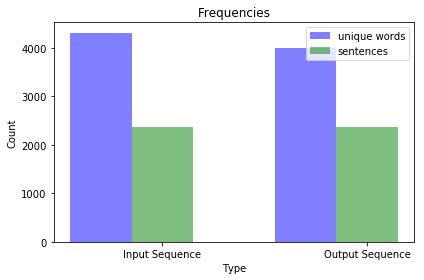

In [13]:
import matplotlib.pyplot as plt
 
n_groups = 2

unique = (unique_input, unique_output)
sentences = (len(sentences_input), len(sentences_output))
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.5
 
rects1 = plt.bar(index, unique, bar_width,
                 alpha=opacity,
                 color='b',
                 label='unique words')
 
rects2 = plt.bar(index + bar_width, sentences, bar_width,
                 alpha=opacity,
                 color='g',
                 label='sentences')
 
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Frequencies')
plt.xticks(index + bar_width, ('Input Sequence', 'Output Sequence'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [171]:
g = set([word for sentance in input_text.split('\n') for word in sentance.split(' ')])
len(g)

4308

In [146]:
input_text = input_text.lower()
output_text = output_text.lower()

In [247]:
def extract_character_vocab(data):
    special_words = ['<PAD>', '<UNK>', '<GO>',  '<EOS>']

    set_words = set([word for sentance in data.split('\n') for word in sentance.split()])
    int_to_vocab = {word_i: word for word_i, word in enumerate(special_words + list(set_words))}
    vocab_to_int = {word: word_i for word_i, word in int_to_vocab.items()}

    return int_to_vocab, vocab_to_int

# Build int2letter and letter2int dicts
input_int_to_vocab, input_vocab_to_int = extract_character_vocab(input_text)
output_int_to_vocab, output_vocab_to_int = extract_character_vocab(output_text)

# Convert characters to ids
inputs_ids = [[input_vocab_to_int.get(word, input_vocab_to_int['<UNK>']) for word in sentance.split()] 
                                                                  for sentance in input_text.split('\n')]

output_ids = [[output_vocab_to_int.get(word, output_vocab_to_int['<UNK>']) for word in sentance.split()] + [output_vocab_to_int['<EOS>']]
                                                                         for sentance in input_text.split('\n')] 

print("Example source sequence")
print(len(inputs_ids[0]))
print("\n")
print("Example target sequence")
print(len(output_ids[0]))

Example source sequence
1


Example target sequence
2


In [248]:
inputs_ids[:5]

[[2301],
 [2254, 4068, 1211, 2939, 3246, 2216, 243, 2704, 1222, 3203, 2481, 1478],
 [382, 720, 3517, 805, 1420, 3128, 3513, 2284, 2714, 3155, 848],
 [382, 3321, 3758, 567, 2526, 3517, 2693, 3128],
 [243, 2785, 1810, 2395, 3517, 2675, 3513, 3154, 4172, 1581, 3128]]

In [249]:
print (len(input_vocab_to_int))
print (len(input_int_to_vocab))
print (len(output_vocab_to_int))
print (len(output_int_to_vocab))

4311
4311
3999
3999


In [250]:
print (list(input_vocab_to_int.keys())[:20])
print (list(input_int_to_vocab.keys())[:20])

['<PAD>', '<UNK>', '<GO>', '<EOS>', 'member', 'korea', 'o.o', 'bot,', "bo'lardi", 'creo', 'messenger', 'sedikit', 'day', 'development', 'open-source', 'vzlom', 'fine.do', 'everybody', 'opinion...', 'whaz']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [251]:
print (list(output_vocab_to_int.keys())[:20])
print (list(output_int_to_vocab.keys())[:20])

['<PAD>', '<UNK>', '<GO>', '<EOS>', 'member', 'find.', 'bot,', 'pidaraz.', 'creo', 'messenger', 'sedikit', 'déjà', 'day', 'leyendo', 'expressiveness', '😱🙈👻', 'development', 'homework.', 'chatbot,', 'todo.']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [252]:
def text_to_ids(input_text, output_text, input_vocab_to_int, output_vocab_to_int):   
    
    input_ids = [[input_vocab_to_int[word] for word in sentence.split()]
                      for sentence in input_text.split("\n")]
    
    output_ids = [[output_vocab_to_int[word] for word in sentence.split()] + [output_vocab_to_int["<EOS>"]]
                      for sentence in output_text.split("\n")]
    
    return input_ids, output_ids

In [253]:
inputs_ids, output_ids = text_to_ids(input_text, output_text, input_vocab_to_int, output_vocab_to_int)

In [254]:
print (inputs_ids[:5])
print (output_ids[:5])

[[2301], [2254, 4068, 1211, 2939, 3246, 2216, 243, 2704, 1222, 3203, 2481, 1478], [382, 720, 3517, 805, 1420, 3128, 3513, 2284, 2714, 3155, 848], [382, 3321, 3758, 567, 2526, 3517, 2693, 3128], [243, 2785, 1810, 2395, 3517, 2675, 3513, 3154, 4172, 1581, 3128]]
[[2330, 3528, 363, 3534, 3271, 1141, 2934, 3214, 3], [3880, 2333, 240, 3826, 1141, 3], [2342, 2795, 240, 1486, 3194, 3271, 2398, 258, 2146, 185, 3587, 3625, 2381, 113, 1012, 471, 2108, 2398, 455, 3502, 530, 1141, 3], [1012, 2383, 3099, 1141, 3194, 546, 750, 2512, 2606, 2670, 2523, 155, 2230, 3], [2918, 2286, 299, 1809, 2544, 2754, 1445, 2119, 1039, 1764, 2179, 3]]


In [255]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
#assert LooseVersion(tf.__version__) in [LooseVersion('1.0.0'), LooseVersion('1.0.1')], 'This project requires TensorFlow version 1.0  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: No GPU found. Please use a GPU to train your neural network.


## Model

In [256]:
def get_model_inputs():
    input_data = tf.placeholder(tf.int32, [None, None], name='input')
    targets = tf.placeholder(tf.int32, [None, None], name='targets')
    lr = tf.placeholder(tf.float32, name='learning_rate')

    target_sequence_length = tf.placeholder(tf.int32, (None,), name='target_sequence_length')
    max_target_sequence_length = tf.reduce_max(target_sequence_length, name='max_target_len')
    source_sequence_length = tf.placeholder(tf.int32, (None,), name='source_sequence_length')
    
    return input_data, targets, lr, target_sequence_length, max_target_sequence_length, source_sequence_length

In [257]:
def encoding_layer(input_data, rnn_size, num_layers,
                   source_sequence_length, source_vocab_size, 
                   encoding_embedding_size):


    # Encoder embedding
    enc_embed_input = tf.contrib.layers.embed_sequence(input_data, source_vocab_size, encoding_embedding_size)

    # RNN cell
    def make_cell(rnn_size):
        enc_cell = tf.contrib.rnn.LSTMCell(rnn_size,
                                           initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
        return enc_cell

    enc_cell = tf.contrib.rnn.MultiRNNCell([make_cell(rnn_size) for _ in range(num_layers)])
    
    enc_output, enc_state = tf.nn.dynamic_rnn(enc_cell, enc_embed_input, sequence_length=source_sequence_length, dtype=tf.float32)
    
    return enc_output, enc_state

In [258]:
# Process the input we'll feed to the decoder
def process_decoder_input(target_data, vocab_to_int, batch_size):
    '''Remove the last word id from each batch and concat the <GO> to the begining of each batch'''
    ending = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])
    dec_input = tf.concat([tf.fill([batch_size, 1], vocab_to_int['<GO>']), ending], 1)

    return dec_input

In [259]:
def decoding_layer(target_letter_to_int, decoding_embedding_size, num_layers, rnn_size,
                   target_sequence_length, max_target_sequence_length, enc_state, dec_input):
    # 1. Decoder Embedding
    target_vocab_size = len(target_letter_to_int)
    dec_embeddings = tf.Variable(tf.random_uniform([target_vocab_size, decoding_embedding_size]))
    dec_embed_input = tf.nn.embedding_lookup(dec_embeddings, dec_input)

    # 2. Construct the decoder cell
    def make_cell(rnn_size):
        dec_cell = tf.contrib.rnn.LSTMCell(rnn_size,
                                           initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
        return dec_cell

    dec_cell = tf.contrib.rnn.MultiRNNCell([make_cell(rnn_size) for _ in range(num_layers)])
     
    # 3. Dense layer to translate the decoder's output at each time 
    # step into a choice from the target vocabulary
    output_layer = Dense(target_vocab_size,
                         kernel_initializer = tf.truncated_normal_initializer(mean = 0.0, stddev=0.1))


    # 4. Set up a training decoder and an inference decoder
    # Training Decoder
    with tf.variable_scope("decode"):

        # Helper for the training process. Used by BasicDecoder to read inputs.
        training_helper = tf.contrib.seq2seq.TrainingHelper(inputs=dec_embed_input,
                                                            sequence_length=target_sequence_length,
                                                            time_major=False)
        
        
        # Basic decoder
        training_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                           training_helper,
                                                           enc_state,
                                                           output_layer) 
        
        # Perform dynamic decoding using the decoder
        training_decoder_output = tf.contrib.seq2seq.dynamic_decode(training_decoder,
                                                                       impute_finished=True,
                                                                       maximum_iterations=max_target_sequence_length)[0]
    # 5. Inference Decoder
    # Reuses the same parameters trained by the training process
    with tf.variable_scope("decode", reuse=True):
        start_tokens = tf.tile(tf.constant([target_letter_to_int['<GO>']], dtype=tf.int32), [batch_size], name='start_tokens')

        # Helper for the inference process.
        inference_helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(dec_embeddings,
                                                                start_tokens,
                                                                target_letter_to_int['<EOS>'])

        # Basic decoder
        inference_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                        inference_helper,
                                                        enc_state,
                                                        output_layer)
        
        # Perform dynamic decoding using the decoder
        inference_decoder_output = tf.contrib.seq2seq.dynamic_decode(inference_decoder,
                                                            impute_finished=True,
                                                            maximum_iterations=max_target_sequence_length)[0]
         

    
    return training_decoder_output, inference_decoder_output

In [260]:
from tensorflow.python.layers.core import Dense

def seq2seq_model(input_data, targets, lr, target_sequence_length, 
                  max_target_sequence_length, source_sequence_length,
                  source_vocab_size, target_vocab_size,
                  enc_embedding_size, dec_embedding_size, 
                  rnn_size, num_layers):
    
    # Pass the input data through the encoder. We'll ignore the encoder output, but use the state
    _, enc_state = encoding_layer(input_data, 
                                  rnn_size, 
                                  num_layers, 
                                  source_sequence_length,
                                  source_vocab_size, 
                                  encoding_embedding_size)
    
    
    # Prepare the target sequences we'll feed to the decoder in training mode
    dec_input = process_decoder_input(targets, output_vocab_to_int, batch_size)
    
    # Pass encoder state and decoder inputs to the decoders
    training_decoder_output, inference_decoder_output = decoding_layer(output_vocab_to_int, 
                                                                       decoding_embedding_size, 
                                                                       num_layers, 
                                                                       rnn_size,
                                                                       target_sequence_length,
                                                                       max_target_sequence_length,
                                                                       enc_state, 
                                                                       dec_input) 
    
    return training_decoder_output, inference_decoder_output

In [261]:
# Build the graph
train_graph = tf.Graph()
# Set the graph to default to ensure that it is ready for training
with train_graph.as_default():
    
    # Load the model inputs    
    input_data, targets, lr, target_sequence_length, max_target_sequence_length, source_sequence_length = get_model_inputs()
    
    # Create the training and inference logits
    training_decoder_output, inference_decoder_output = seq2seq_model(input_data, 
                                                                      targets, 
                                                                      lr, 
                                                                      target_sequence_length, 
                                                                      max_target_sequence_length, 
                                                                      source_sequence_length,
                                                                      len(input_vocab_to_int),
                                                                      len(output_vocab_to_int),
                                                                      encoding_embedding_size, 
                                                                      decoding_embedding_size, 
                                                                      rnn_size, 
                                                                      num_layers)    
    
    # Create tensors for the training logits and inference logits
    training_logits = tf.identity(training_decoder_output.rnn_output, 'logits')
    inference_logits = tf.identity(inference_decoder_output.sample_id, name='predictions')
    
    # Create the weights for sequence_loss
    masks = tf.sequence_mask(target_sequence_length, max_target_sequence_length, dtype=tf.float32, name='masks')

    with tf.name_scope("optimization"):
        
        # Loss function
        cost = tf.contrib.seq2seq.sequence_loss(
            training_logits,
            targets,
            masks)

        # Optimizer
        optimizer = tf.train.AdamOptimizer(lr)

        # Gradient Clipping
        gradients = optimizer.compute_gradients(cost)
        capped_gradients = [(tf.clip_by_value(grad, -5., 5.), var) for grad, var in gradients if grad is not None]
        train_op = optimizer.apply_gradients(capped_gradients)

In [262]:
def pad_sentence_batch(sentence_batch, pad_int):
    """Pad sentences with <PAD> so that each sentence of a batch has the same length"""
    max_sentence = max([len(sentence) for sentence in sentence_batch])
    return [sentence + [pad_int] * (max_sentence - len(sentence)) for sentence in sentence_batch]


def pad_id_sequences(source_ids, source_vocab_to_int, target_ids, target_vocab_to_int, sequence_length):
    new_source_ids = [list(reversed(sentence + [source_vocab_to_int['<pad>']] * (sequence_length - len(sentence)))) \
                      for sentence in source_ids]
    new_target_ids = [sentence + [target_vocab_to_int['<pad>']] * (sequence_length - len(sentence)) \
                      for sentence in target_ids]

    return new_source_ids, new_target_ids

In [263]:
def get_batches(targets, sources, batch_size, source_pad_int, target_pad_int):
    """Batch targets, sources, and the lengths of their sentences together"""
    for batch_i in range(0, len(sources)//batch_size):
        start_i = batch_i * batch_size
        sources_batch = sources[start_i:start_i + batch_size]
        targets_batch = targets[start_i:start_i + batch_size]
        pad_sources_batch = np.array(pad_sentence_batch(sources_batch, source_pad_int))
        pad_targets_batch = np.array(pad_sentence_batch(targets_batch, target_pad_int))
        
        # Need the lengths for the _lengths parameters
        pad_targets_lengths = []
        for target in pad_targets_batch:
            pad_targets_lengths.append(len(target))
        
        pad_source_lengths = []
        for source in pad_sources_batch:
            pad_source_lengths.append(len(source))
        
        yield pad_targets_batch, pad_sources_batch, pad_targets_lengths, pad_source_lengths

In [266]:

# Number of Epochs
epochs = 20
# Batch Size
batch_size = 128
# RNN Size
rnn_size = 256
# Number of Layers
num_layers = 2
# Embedding Size
encoding_embedding_size = 15
decoding_embedding_size = 15
# Learning Rate
learning_rate = 0.005

In [267]:
# Split data to training and validation sets
train_source = inputs_ids[batch_size:]
train_target = output_ids[batch_size:]
valid_source = inputs_ids[:batch_size]
valid_target = output_ids[:batch_size]
(valid_targets_batch, valid_sources_batch, valid_targets_lengths, valid_sources_lengths) = next(get_batches(valid_target, valid_source, batch_size,
                           input_vocab_to_int['<PAD>'],
                           output_vocab_to_int['<PAD>']))

display_step = 2 # Check training loss after every 20 batches

checkpoint = "best_model.ckpt" 
with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())
        
    for epoch_i in range(1, epochs+1):
        for batch_i, (targets_batch, sources_batch, targets_lengths, sources_lengths) in enumerate(
                get_batches(train_target, train_source, batch_size,
                           input_vocab_to_int['<PAD>'],
                           output_vocab_to_int['<PAD>'])):
            
            # Training step
            _, loss = sess.run(
                [train_op, cost],
                {input_data: sources_batch,
                 targets: targets_batch,
                 lr: learning_rate,
                 target_sequence_length: targets_lengths,
                 source_sequence_length: sources_lengths})

            # Debug message updating us on the status of the training
            if batch_i % display_step == 0 and batch_i > 0:
                
                # Calculate validation cost
                validation_loss = sess.run(
                [cost],
                {input_data: valid_sources_batch,
                 targets: valid_targets_batch,
                 lr: learning_rate,
                 target_sequence_length: valid_targets_lengths,
                 source_sequence_length: valid_sources_lengths})
                
                print('Epoch {:>3}/{} Batch {:>4}/{} - Loss: {:>6.3f}  - Validation loss: {:>6.3f}'
                      .format(epoch_i,
                              epochs, 
                              batch_i, 
                              len(train_source) // batch_size, 
                              loss, 
                              validation_loss[0]))

    
    
    # Save Model
    saver = tf.train.Saver()
    saver.save(sess, checkpoint)
    print('Model Trained and Saved')

Epoch   1/20 Batch    2/17 - Loss:  2.687  - Validation loss:  2.648
Epoch   1/20 Batch    4/17 - Loss:  2.272  - Validation loss:  2.804
Epoch   1/20 Batch    6/17 - Loss:  1.093  - Validation loss:  2.413
Epoch   1/20 Batch    8/17 - Loss:  0.689  - Validation loss:  2.109
Epoch   1/20 Batch   10/17 - Loss:  1.517  - Validation loss:  2.095
Epoch   1/20 Batch   12/17 - Loss:  1.591  - Validation loss:  2.033
Epoch   1/20 Batch   14/17 - Loss:  1.515  - Validation loss:  2.034
Epoch   1/20 Batch   16/17 - Loss:  1.757  - Validation loss:  1.992
Epoch   2/20 Batch    2/17 - Loss:  1.948  - Validation loss:  2.027
Epoch   2/20 Batch    4/17 - Loss:  1.572  - Validation loss:  2.150
Epoch   2/20 Batch    6/17 - Loss:  0.818  - Validation loss:  2.016
Epoch   2/20 Batch    8/17 - Loss:  0.619  - Validation loss:  1.973
Epoch   2/20 Batch   10/17 - Loss:  1.336  - Validation loss:  1.982
Epoch   2/20 Batch   12/17 - Loss:  1.486  - Validation loss:  2.006
Epoch   2/20 Batch   14/17 - Loss:

KeyboardInterrupt: 

In [268]:
def source_to_seq(text):
    '''Prepare the text for the model'''
    sequence_length = 15
    text = text.lower()
    return [input_vocab_to_int.get(word, input_vocab_to_int['<UNK>']) for word in text.split()] + [input_vocab_to_int['<PAD>']]*(sequence_length-len(text))



In [269]:
%%time
input_sentence = 'How can I be the best ?'
text = source_to_seq(input_sentence)

checkpoint = "./best_model.ckpt"

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load saved model
    loader = tf.train.import_meta_graph(checkpoint + '.meta')
    loader.restore(sess, checkpoint)

    input_data = loaded_graph.get_tensor_by_name('input:0')
    logits = loaded_graph.get_tensor_by_name('predictions:0')
    source_sequence_length = loaded_graph.get_tensor_by_name('source_sequence_length:0')
    target_sequence_length = loaded_graph.get_tensor_by_name('target_sequence_length:0')
    
    #Multiply by batch_size to match the model's input parameters
    answer_logits = sess.run(logits, {input_data: [text]*batch_size, 
                                      target_sequence_length: [len(text)]*batch_size, 
                                      source_sequence_length: [len(text)]*batch_size})[0] 

print(answer_logits)
pad = input_vocab_to_int["<PAD>"] 

print('Original Text:', input_sentence)

print('\nSource')
print('  Word Ids:    {}'.format([i for i in text]))
print('  Input Words: {}'.format(" ".join([input_int_to_vocab[i] for i in text])))

print('\nTarget')
print('  Word Ids:       {}'.format([i for i in answer_logits if i != pad]))
print('  Response Words: {}'.format(" ".join([output_int_to_vocab[i] for i in answer_logits if i != pad])))

INFO:tensorflow:Restoring parameters from ./best_model.ckpt
[0 0 0 0 0 0 0]
Original Text: How can I be the best ?

Source
  Word Ids:    [382, 2545, 1067, 487, 3154, 561, 3128]
  Input Words: how can i be the best ?

Target
  Word Ids:       []
  Response Words: 
CPU times: user 9.38 s, sys: 194 ms, total: 9.58 s
Wall time: 9.52 s
